# Food Clustering


### Aim 
The purpose of this notebook is explore the hidden relationship with foods based on a few common nutrients.

In [289]:
#warnings :)
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


## 1. Reading in the Data

In [290]:
## Read in csv file
df = pd.read_csv('alldata.csv')

In [291]:
#check the data
df.head()



,ID,NDB_No,Shrt_Desc,Long_Desc,Water_g,Energ_Kcal,Protein_g,Lipid_Tot_g,Ash_g,Carbohydrt_g,...,FA_Mono_g,FA_Poly_g,Cholestrl_mg,GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,My_Food,creator
0,1,1001,"BUTTER,WITH SALT","Butter, salted",15.87,717,0.85,81.11,2.11,0.06,...,21.021,3.043,215,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0,0,NaN
1,2,1002,"BUTTER,WHIPPED,W/ SALT","Butter, whipped, with salt",16.72,718,0.49,78.30,1.62,2.87,...,19.874,3.331,225,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0,0,NaN
2,3,1003,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",0.24,876,0.28,99.48,0.00,0.00,...,28.732,3.694,256,12.80,1 tbsp,205.0,1 cup,0,0,NaN
3,4,1004,"CHEESE,BLUE","Cheese, blue",42.41,353,21.40,28.74,5.11,2.34,...,7.778,0.800,75,28.35,1 oz,17.0,1 cubic inch,0,0,NaN
4,5,1005,"CHEESE,BRICK","Cheese, brick",41.11,371,23.24,29.68,3.18,2.79,...,8.598,0.784,94,132.00,"1 cup, diced",113.0,"1 cup, shredded",0,0,NaN


In [292]:
# Check the shape of the data
df.shape

(8789, 57)

So we have 8,789 rows and 57 columns

## 2. Exploratory Data Analysis

### Checking for missing values
From our observation we see that we have all the values. Some of these values are zero. I would expect that all the nutrients datatypes would be floats, but I am also seeing some ints. It is also observed that there are a few columns that we are not be interested in for this purpose (since we are clustering based on the foods nutrients)...eg. GmWt. The Refuse_pct is the portion of inedible portion of the food in percentage and seems to have a large number of zeros, but we will keep that in mind. Let's keep it for now.

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8789 non-null   int64  
 1   NDB_No            8789 non-null   int64  
 2   Shrt_Desc         8789 non-null   object 
 3   Long_Desc         8789 non-null   object 
 4   Water_g           8789 non-null   float64
 5   Energ_Kcal        8789 non-null   int64  
 6   Protein_g         8789 non-null   float64
 7   Lipid_Tot_g       8789 non-null   float64
 8   Ash_g             8789 non-null   float64
 9   Carbohydrt_g      8789 non-null   float64
 10  Fiber_TD_g        8789 non-null   float64
 11  Sugar_Tot_g       8789 non-null   float64
 12  Calcium_mg        8789 non-null   int64  
 13  Iron_mg           8789 non-null   float64
 14  Magnesium_mg      8789 non-null   int64  
 15  Phosphorus_mg     8789 non-null   int64  
 16  Potassium_mg      8789 non-null   int64  


### Dropping Columns

In [294]:
# Let us drop the columns that we are not interested in
columns_to_drop = ['ID','NDB_No', 'Long_Desc','GmWt_1','GmWt_2', 'GmWt_Desc1', 'GmWt_Desc2','My_Food','creator']
df = df.drop(columns_to_drop, axis=1)

In [295]:
# check again
df.head()

,Shrt_Desc,Water_g,Energ_Kcal,Protein_g,Lipid_Tot_g,Ash_g,Carbohydrt_g,Fiber_TD_g,Sugar_Tot_g,Calcium_mg,...,LutZea_mu_g,Vit_E_mg,Vit_D_mu_g,Vit_D_IU,Vit_K_mu_g,FA_Sat_g,FA_Mono_g,FA_Poly_g,Cholestrl_mg,Refuse_Pct
0,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24,...,0,2.32,0.0,0,7.0,51.368,21.021,3.043,215,0
1,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,23,...,13,1.37,0.0,0,4.6,45.390,19.874,3.331,225,0
2,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,4,...,0,2.80,0.0,0,8.6,61.924,28.732,3.694,256,0
3,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,528,...,0,0.25,0.5,21,2.4,18.669,7.778,0.800,75,0
4,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,674,...,0,0.26,0.5,22,2.5,18.764,8.598,0.784,94,0


In [296]:
# Get Columns except Shrt_Desc so that we can only scale those values
col_names = df.columns[1:]

In [297]:
### Scaling Columns
from sklearn.preprocessing import MinMaxScaler

#copy the dataframe
df_scaled = df.copy()
features = df_scaled[col_names]

scaler = MinMaxScaler()
features = scaler.fit_transform(features.values)
df_scaled[col_names] = features
print("Scaled DataSet")
df_scaled



Scaled DataSet


,Shrt_Desc,Water_g,Energ_Kcal,Protein_g,Lipid_Tot_g,Ash_g,Carbohydrt_g,Fiber_TD_g,Sugar_Tot_g,Calcium_mg,...,LutZea_mu_g,Vit_E_mg,Vit_D_mu_g,Vit_D_IU,Vit_K_mu_g,FA_Sat_g,FA_Mono_g,FA_Poly_g,Cholestrl_mg,Refuse_Pct
0,"BUTTER,WITH SALT",0.1587,0.794900,0.009624,0.8111,0.021142,0.0006,0.0,0.000601,0.003259,...,0.00000,0.015529,0.0000,0.0000,0.004083,0.537322,0.251180,0.040778,0.069355,0.0
1,"BUTTER,WHIPPED,W/ SALT",0.1672,0.796009,0.005548,0.7830,0.016232,0.0287,0.0,0.000601,0.003123,...,0.00066,0.009170,0.0000,0.0000,0.002683,0.474791,0.237474,0.044638,0.072581,0.0
2,"BUTTER OIL,ANHYDROUS",0.0024,0.971175,0.003170,0.9948,0.000000,0.0000,0.0,0.000000,0.000543,...,0.00000,0.018742,0.0000,0.0000,0.005016,0.647741,0.343319,0.049502,0.082581,0.0
3,"CHEESE,BLUE",0.4241,0.391353,0.242301,0.2874,0.051202,0.0234,0.0,0.005010,0.071700,...,0.00000,0.001673,0.0020,0.0021,0.001400,0.195282,0.092939,0.010721,0.024194,0.0
4,"CHEESE,BRICK",0.4111,0.411308,0.263134,0.2968,0.031864,0.0279,0.0,0.005110,0.091526,...,0.00000,0.001740,0.0020,0.0022,0.001458,0.196276,0.102738,0.010506,0.030323,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,"MACKEREL,SALTED",0.4300,0.338137,0.209466,0.2510,0.134269,0.0000,0.0,0.000000,0.008963,...,0.00000,0.015930,0.1008,0.1006,0.004549,0.074770,0.099416,0.083218,0.030645,0.0
8785,"SCALLOP,(BAY&SEA),CKD,STMD",0.7025,0.123060,0.232563,0.0084,0.029760,0.0541,0.0,0.000000,0.001358,...,0.00000,0.000000,0.0000,0.0002,0.000000,0.002280,0.000980,0.002975,0.013226,0.0
8786,"SYRUP,CANE",0.2600,0.298226,0.000000,0.0000,0.008617,0.7314,0.0,0.733467,0.001765,...,0.00000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8787,"SNAIL,RAW",0.7920,0.099778,0.182292,0.0140,0.013026,0.0200,0.0,0.000000,0.001358,...,0.00000,0.033467,0.0000,0.0000,0.000058,0.003776,0.003095,0.003377,0.016129,0.0


### K-Means Clustering

K-means is a centroid-based algorithm/distance-based algorithm. The distances are calculaed and points are assigned to a cluster. 
Steps:
- Choose k clusters
- Select k random points as centroids (There are other ways to start)
- Assign all the points to the closest centroid
- Recalculate centroids with the new clusters
- Repeat assigning and recalculating (last two steps above)

### Finding the optimum numbers of clusters for K-nearest neighbour
Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. Therefore a good model is one with low inertia AND a low number of clusters ( K ).

In [298]:
from sklearn.cluster import KMeans

wcss = [] #within clusters of sum of squares
for i in range(1, 50):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)



#### Using the elbow method to determine the optimal number of clusters for k-means clustering

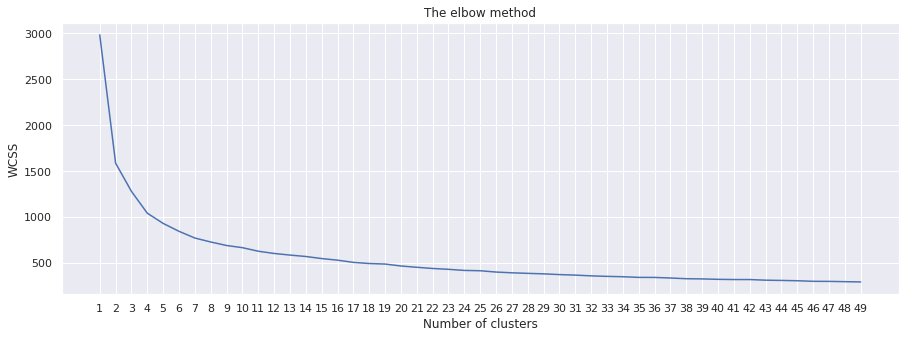

In [299]:
plt.figure(figsize=(15,5))
plt.plot(range(1, 50), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.xticks(range(1, 50))
plt.show()

### Implementing K-Means with 20 clusters

In [300]:
kmeans = KMeans(n_clusters = 20, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(features)



In [301]:
#for y in y_kmeans:
#    print(y)
#print(len(kmeans.cluster_centers_))
#print(kmeans.labels_)
#print(y_kmeans)
#print(features[y_kmeans == 0,0])
#print(features)


### Reduce the dimensions using PCA 
The plan is to see if we can reduce the dimensions to 3 so we can visualize of plot

In [302]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(features)
X_components=pca.transform(features)

In [303]:
X_components

array([[ 0.49515475,  0.87518381],
       [ 0.49612158,  0.82906265],
       [ 0.71141884,  1.10308543],
       ...,
       [ 0.58113245, -0.48730719],
       [-0.35391209, -0.02696704],
       [-0.38096867, -0.01410189]])

Store components in Pandas Dataframe

In [304]:
components_df = pd.DataFrame({'component_one': list(X_components[:,0]), 'component_two': list(X_components[:,1]) })

print(components_df.head())

   component_one  component_two
0       0.495155       0.875184
1       0.496122       0.829063
2       0.711419       1.103085
3       0.058801       0.343313
4       0.078955       0.362007


In [305]:
#features

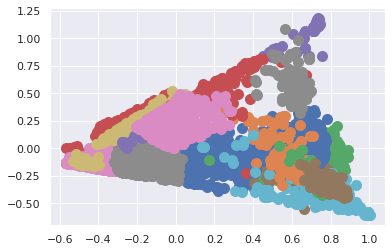

In [306]:
for i in range(20):
    plt.scatter(X_components[y_kmeans == i, 0], X_components[y_kmeans == i, 1], s=100)

In [307]:
df_scaled['Shrt_Desc']

0                 BUTTER,WITH SALT
1           BUTTER,WHIPPED,W/ SALT
2             BUTTER OIL,ANHYDROUS
3                      CHEESE,BLUE
4                     CHEESE,BRICK
                   ...            
8784               MACKEREL,SALTED
8785    SCALLOP,(BAY&SEA),CKD,STMD
8786                    SYRUP,CANE
8787                     SNAIL,RAW
8788              TURTLE,GREEN,RAW
Name: Shrt_Desc, Length: 8789, dtype: object

In [308]:
components_df['Food'] = df_scaled['Shrt_Desc']

In [309]:
components_df.head()

,component_one,component_two,Food
0,0.495155,0.875184,"BUTTER,WITH SALT"
1,0.496122,0.829063,"BUTTER,WHIPPED,W/ SALT"
2,0.711419,1.103085,"BUTTER OIL,ANHYDROUS"
3,0.058801,0.343313,"CHEESE,BLUE"
4,0.078955,0.362007,"CHEESE,BRICK"


In [310]:
#convert y_kmeans to dataframe
y_kmeans_df = pd.DataFrame({'clusters': y_kmeans})
#y_kmeans


In [311]:
components_df['clusters'] = y_kmeans_df['clusters']

In [312]:
components_df.groupby('clusters').head(60)

,component_one,component_two,Food,clusters
0,0.495155,0.875184,"BUTTER,WITH SALT",4
1,0.496122,0.829063,"BUTTER,WHIPPED,W/ SALT",4
2,0.711419,1.103085,"BUTTER OIL,ANHYDROUS",4
3,0.058801,0.343313,"CHEESE,BLUE",16
4,0.078955,0.362007,"CHEESE,BRICK",16
...,...,...,...,...
8322,-0.232734,0.058893,"MOOSE,LIVER,BRSD (ALASKA NATIVE)",14
8431,-0.416407,-0.143352,"STINGING NETTLES,BLANCHED (NORTHERN PLAINS IND...",18
8709,0.757709,-0.420594,"BEVER,FRUIT-FLAV DRK,PDR,W/ HI VIT C W/ OTHER ...",12
8723,-0.506313,-0.138141,"TURNIP GRNS,CND,NO SALT",18


In [313]:
components_df[components_df['clusters'] == 0]

,component_one,component_two,Food,clusters
66,0.128961,0.069821,"DESSERT TOPPING,SEMI SOLID,FRZ",0
142,0.102591,-0.018728,"CHEESE SUB,MOZZARELLA",0
174,0.163311,-0.126355,"CREAM SUB,FLAV,LIQ",0
201,0.163541,0.088337,"ICE CRM,BAR OR STK,CHOC COVERED",0
202,0.139736,-0.140446,ICE CRM SNDWCH,0
...,...,...,...,...
8705,0.039669,0.037958,"SALAD DRSNG,MAYO & MAYONNAISE-TYPE,LO CAL",0
8738,0.315524,-0.174602,"ROLLS,PUMPERNICKEL",0
8747,0.228804,-0.000779,"ICE CRM BAR,CHOC OR CARAMEL COVERED,W/NUTS",0
8776,0.160483,-0.349987,"JELLIES,RED SUGAR,HOME PRESERVED",0


In [314]:
components_df[components_df['clusters'] == 15].sample(20)

,component_one,component_two,Food,clusters
333,0.788683,-0.330104,"BABYFOOD,FINGER SNACKS,GERBER,GRADUATES,PUFFS,...",15
1784,0.822462,-0.355004,"CEREALS RTE,GENERAL MILLS,COOKIE CRISP",15
1845,0.662245,-0.289397,"CEREALS,MALT-O-MEAL,ORIGINAL,PLN,DRY",15
2021,0.825073,-0.351295,"CEREALS RTE,GENERAL MILLS,FRUITY CHEERIOS",15
1802,0.807987,-0.346280,"CEREALS RTE,QUAKER,KING VITAMAN",15
2116,0.791905,-0.349793,"CEREALS RTE,KELLOGG'S,SPL K GLUTEN FREE,TOUCH ...",15
2064,0.795700,-0.302054,"CEREALS RTE,POST,HONEY BUNCHES OF OATS,PECAN B...",15
1816,0.829572,-0.400130,"CEREALS RTE,KELLOGG,KELLOGG'S CORN POPS",15
1891,0.744743,-0.256848,"CEREALS RTE,QUAKER,TSTD MULTIGRAIN CRISPS",15
2036,0.793239,-0.306153,"CEREALS RTE,KELLOGG,KELLOGG'S SPL K,CINN PECAN",15


In [315]:
components_df[components_df['clusters'] == 10].sample(20)

,component_one,component_two,Food,clusters
5736,0.693079,0.026457,"CRACKERS,STD SNACK-TYPE,SNDWCH,W/CHS FILLING",10
6055,0.740097,0.175066,"CORN-BASED,EXTRUDED,PUFFS OR TWISTS,CHEESE-FLAVOR",10
8127,0.695239,-0.101324,"CRACKERS,TOAST THINS,LO NA",10
8043,0.702298,0.057350,"SUNSHINE,GRIPZ,CHEEZ-IT CRACKERS",10
8165,0.690999,-0.018002,"PEPPERIDGE FARM,GOLDFISH,BKD SNACK CRACKERS,PA...",10
8103,0.653043,0.178761,"COOKIES,PNUT BUTTER,COMMLY PREP,SUGAR FREE",10
5990,0.746304,0.012670,"PIE CRUST,COOKIE-TYPE,GRAHAM CRACKER,READY CRUST",10
7718,0.738121,0.016384,"SNACKS,FRITOLAY,SUNCHIPS,MULTIGRAIN,HARVEST CH...",10
5735,0.730796,0.059400,"CRACKERS,STD SNACK-TYPE,REG",10
6401,0.705296,0.113336,"SNACKS,POPCORN,OIL-POPPED,WHITE POPCORN,SALT A...",10


In [316]:
components_df[components_df['clusters'] == 8].sample(20)

,component_one,component_two,Food,clusters
5514,-0.114981,0.321534,"LAMB,NZ,IMP,SQUARE-CUT SHLDR,LN & FAT,CKD,SLOW...",8
923,0.015076,0.307339,"CHICKEN,BROILERS OR FRYERS,WING,MEAT&SKN,CKD,F...",8
2804,-0.201580,0.227335,"PORK,FRSH,LOIN,COUNTRY-STYLE RIBS,LN,BONE-IN,C...",8
6925,-0.118818,0.178756,"KFC,FRIED CHICK,ORIGINAL RECIPE,BREAST,MEAT & ...",8
6930,-0.051549,0.231925,"KFC,FRIED CHICK,EX CRISPY,DRUMSTK,MEAT & SKN W...",8
2553,-0.180053,0.240769,"PORK,FRSH,SHLDR,ARM PICNIC,LN&FAT,CKD,BRSD",8
1188,-0.256586,0.227076,"TURKEY,RTL PARTS,WING,MEAT & SKN,RAW",8
5470,-0.383660,0.063195,"LAMB,NZ,IMP,HEART,RAW",8
5166,-0.283187,0.192315,"LAMB,NZ,IMP,FORE-SHANK,LN & FAT,RAW",8
7247,-0.192893,0.266791,"BEEF,RIB EYE STEAK,BONE-IN,LIP-ON,LN,1/8"" FAT,...",8


In [317]:
components_df[components_df['clusters'] == 3].sample(20)

,component_one,component_two,Food,clusters
896,-0.304637,0.194757,"CHICKEN,BROILERS OR FRYERS,DRUMSTK,MEAT ONLY,C...",3
2429,-0.420956,-0.090905,"PINEAPPLE,RAW,TRADITIONAL VAR",3
1180,-0.294589,0.174777,"TURKEY,DRUMSTK,FROM WHL BIRD,MEAT ONLY,W/ ADDE...",3
2932,-0.257665,-0.071919,"CORN,SWT,YEL,CKD,BLD,DRND,WO/SALT",3
2368,-0.384135,-0.090782,"QUINCES,RAW",3
2534,-0.354254,0.107886,"PORK,FRSH,LOIN,SIRLOIN (CHOPS OR ROASTS),BONE-...",3
3002,-0.542479,-0.061806,"LETTUCE,GRN LEAF,RAW",3
6934,-0.270343,0.196771,"POPEYES,FRIED CHICK,MILD,DRUMSTK,MEAT ONLY,SKN...",3
2224,-0.501271,-0.047075,"GRAPEFRUIT,RAW,PINK & RED,FLORIDA",3
954,-0.161340,0.326453,"CHICKEN,STEWING,DK MEAT,MEAT ONLY,CKD,STWD",3


## Reduce the dimensions using t-SNE

In [318]:
from sklearn.manifold import TSNE

# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(features)

In [319]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y_kmeans})

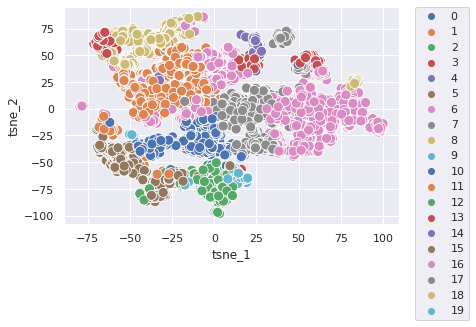

In [320]:
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue= 'label', palette="deep", data=tsne_result_df, ax=ax,s=100)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [321]:
tsne_result_df

,tsne_1,tsne_2,label
0,22.244091,49.631321,4
1,22.321089,49.486534,4
2,18.164616,67.348183,4
3,11.177236,53.782978,16
4,11.242753,52.887901,16
...,...,...,...
8784,10.478667,39.991566,16
8785,-29.108498,4.153646,1
8786,14.265369,-60.344944,9
8787,-29.502565,-4.006526,1


In [322]:
#insert series at specific index
tsne_result_df.insert(2, 'food', df_scaled['Shrt_Desc'])

In [323]:
tsne_result_df.head()

,tsne_1,tsne_2,food,label
0,22.244091,49.631321,"BUTTER,WITH SALT",4
1,22.321089,49.486534,"BUTTER,WHIPPED,W/ SALT",4
2,18.164616,67.348183,"BUTTER OIL,ANHYDROUS",4
3,11.177236,53.782978,"CHEESE,BLUE",16
4,11.242753,52.887901,"CHEESE,BRICK",16


In [324]:
tsne_result_df[tsne_result_df['label'] == 0]

,tsne_1,tsne_2,food,label
66,11.177369,-32.797863,"DESSERT TOPPING,SEMI SOLID,FRZ",0
142,-4.234711,-10.308930,"CHEESE SUB,MOZZARELLA",0
174,8.407427,-41.123795,"CREAM SUB,FLAV,LIQ",0
201,10.536979,-32.819431,"ICE CRM,BAR OR STK,CHOC COVERED",0
202,8.338898,-38.147106,ICE CRM SNDWCH,0
...,...,...,...,...
8705,-1.285736,-9.564153,"SALAD DRSNG,MAYO & MAYONNAISE-TYPE,LO CAL",0
8738,-8.687402,-36.333031,"ROLLS,PUMPERNICKEL",0
8747,6.197714,-43.260792,"ICE CRM BAR,CHOC OR CARAMEL COVERED,W/NUTS",0
8776,15.781689,-45.634537,"JELLIES,RED SUGAR,HOME PRESERVED",0


In [327]:
tsne_result_df[tsne_result_df['label'] == 3].sample(20)

,tsne_1,tsne_2,food,label
2383,55.884903,42.357819,"SOURSOP,RAW",3
3512,54.175770,46.972191,"CORN,SWT,WHITE,CKD,BLD,DRND,WO/SALT",3
305,53.682228,45.443066,"PEPPERMINT,FRESH",3
5169,-60.343914,65.924019,"LAMB,NZ,IMP,FORE-SHANK,LN,CKD,BRSD",3
6917,-62.022739,63.458485,"KFC,FRIED CHICK,ORIGINAL RECIPE,DRUMSTK,MEAT O...",3
3511,55.925915,50.377274,"CORN,SWEET,WHITE,RAW",3
5496,-59.569042,64.542252,"LAMB,NZ,IMP,SQUARE-CUT SHLDR,LN,CKD,SLOW RSTD",3
894,-58.721657,64.956818,"CHICKEN,BROILERS OR FRYERS,DRUMSTK,MEAT ONLY,C...",3
1171,-65.861618,52.428478,"TURKEY,RTL PARTS,DRUMSTK,MEAT ONLY,RAW",3
2368,58.891365,45.411579,"QUINCES,RAW",3
